# Custom Indicator Example

In [1]:
import yfinance as yf

from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, OHLC, Volume


In [2]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-10-14 00:00:00-04:00 to 2024-10-11 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1258 non-null   float64
 1   High          1258 non-null   float64
 2   Low           1258 non-null   float64
 3   Close         1258 non-null   float64
 4   Volume        1258 non-null   int64  
 5   Dividends     1258 non-null   float64
 6   Stock Splits  1258 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.6 KB


In [3]:
from mplchart.model import Indicator
from mplchart.library import get_series, calc_ema

class DEMA(Indicator):
    """Double Exponential Moving Average"""

    same_scale = True
    # same_scale is an optional class attribute
    # to specify that the indicator can be drawn
    # on the same axes as the previous indicator

    def __init__(self, period: int = 20):
        self.period = period

    def __call__(self, prices):
        series = get_series(prices)
        ema1 = calc_ema(series, self.period)
        ema2 = calc_ema(ema1, self.period)
        return 2 * ema1 - ema2

In [4]:
res = DEMA(20)(prices)
res.tail()

Date
2024-10-07 00:00:00-04:00    226.550505
2024-10-08 00:00:00-04:00    226.515450
2024-10-09 00:00:00-04:00    227.163890
2024-10-10 00:00:00-04:00    227.625549
2024-10-11 00:00:00-04:00    227.745996
Name: close, dtype: float64

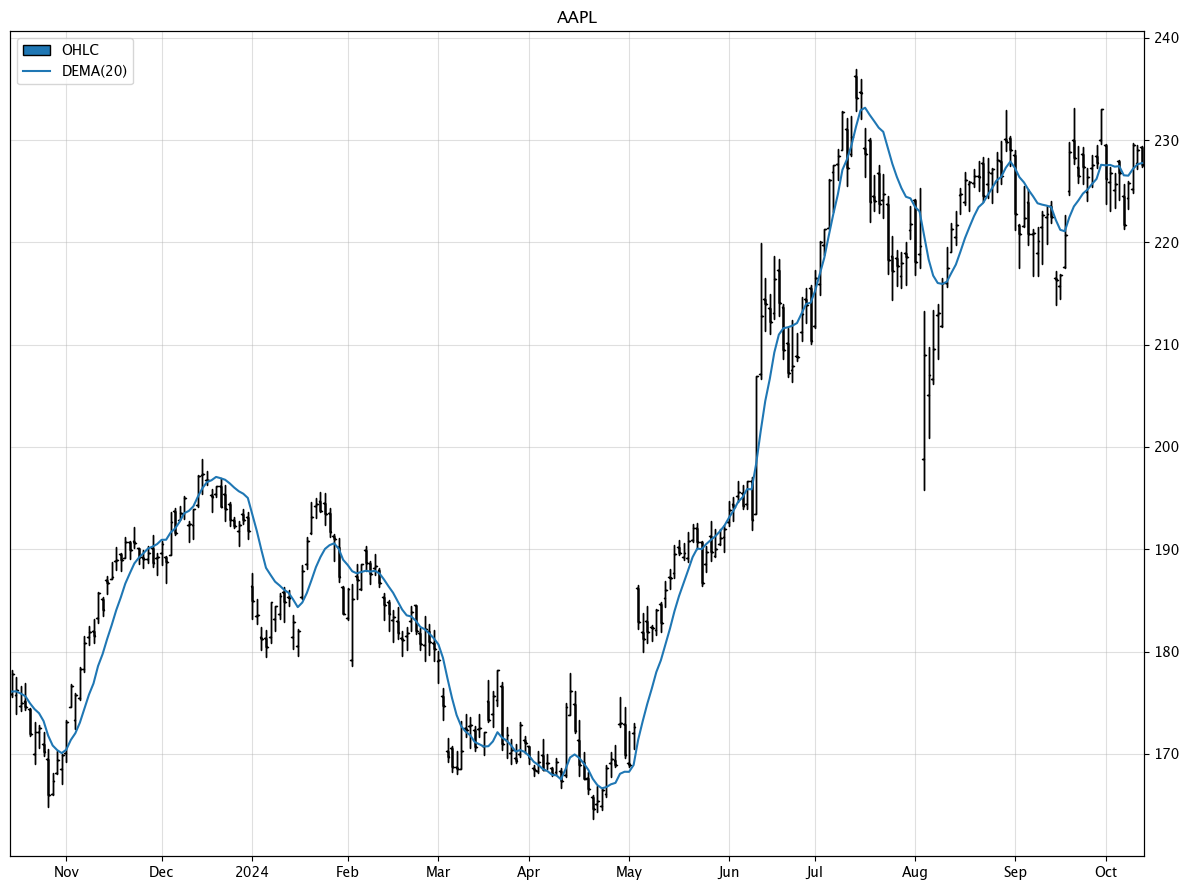

In [5]:
max_bars = 250

indicators = [
    OHLC(),
    DEMA(20),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)
